In [1]:
import numpy as np
import numpy.random as npr
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec  # Import for custom grid layout
import pickle
from pathlib import Path
from config import dir_config
from src.decision_models import *

In [3]:
# stimulus_length = np.random.randint(300,1000,size=1000)
stimulus = np.full((1000, 1000), np.nan)
coherence_levels = [-0.5, -0.2, -0.06, 0.0, 0.06, 0.2, 0.5]
for i in range(1000):
    stimulus[i, :] = np.random.choice(coherence_levels)


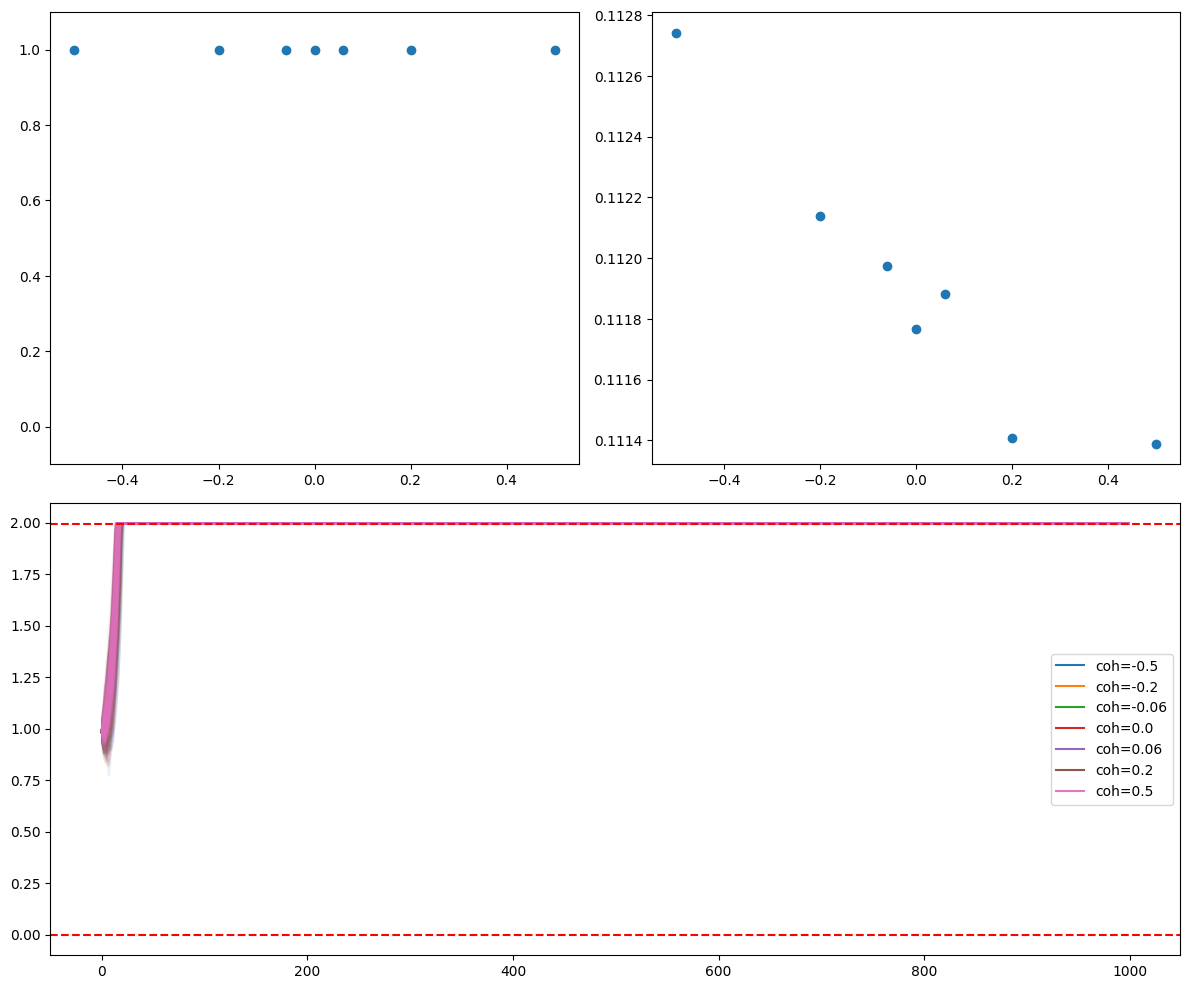

Proportion of invalid trials: 0.0


In [6]:
ddm = DriftDiffusionSimulator()

ddm.ndt = 0.095      # non-decision time
ddm.a = 1.995        # boundary separation
ddm.z = 0.495          # starting point (as a proportion of a)
ddm.drift_gain = 6.995 # gain on the input to get drift rate
ddm.drift_offset = -0.005
ddm.variance = 0.995   # variance of the noise in the accumulation process
ddm.dt = 0.001        # time step for simulation
ddm.leak_rate = 0.095     # leakage parameter
ddm.time_constant = 0.005#1e-2 # urgency signal time constant



rt, choice,dv = ddm.simulate_trials(stimulus)
data = pd.DataFrame({
    "signed_coherence": stimulus[:,0].flatten(),
    "choice": choice.flatten(),
    "rt": rt.flatten(),
})
x_data, y_data = get_psychometric_data(data)
_,_,rt_mean,_,_ = get_chronometric_data(data)
fig = plt.figure(figsize=(12,10))
gs = gridspec.GridSpec(2, 2)

# Top-left subplot
ax1 = fig.add_subplot(gs[0, 0])
ax1.plot(x_data, y_data, 'o')
ax1.set_ylim(-0.1, 1.1)

# Top-right subplot
ax2 = fig.add_subplot(gs[0, 1])
ax2.plot(x_data, rt_mean, 'o')


# Bottom subplot spanning both columns
ax3 = fig.add_subplot(gs[1, :])
for coh in coherence_levels:
    ax3.plot(dv[stimulus[:,0]==coh].T, color=sns.color_palette("tab10")[coherence_levels.index(coh)], alpha=0.1)
    ax3.plot([],[], color=sns.color_palette("tab10")[coherence_levels.index(coh)], alpha=1, label=f'coh={coh}')
ax3.axhline(ddm.a, color='red', linestyle='--')
ax3.axhline(0, color='red', linestyle='--')
ax3.legend()

plt.tight_layout()
plt.show()

print("Proportion of invalid trials:", np.mean(np.isnan(choice)))